In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# FR-CG Algorithm

In [2]:
#Function that returns the value of function given a vector
def func(x):
    val = (x[1]-x[0])**4 + 8*x[0]*x[1] - x[0] + x[1] + 3
    return val

In [3]:
# Analytically defined function to calculate gradient of function at a given point
def gradient(x):
    grad = np.zeros(2)
    grad[0] = -4*(x[1]-x[0])**3 + 8*x[1] -1
    grad[1] = 4*(x[1]-x[0])**3 + 8*x[0] +1
    return grad.reshape((2,1))

In [4]:
#Squared Norm of a two dimensional vector
def sq_norm(x):
    val = x[0]**2 + x[1]**2
    return val

In [21]:
# Function to backtrack value of alpha for given parameters
def backtracking(alpha_in, rho, c, x, iterlim,p):
    i = 0
    alpha = alpha_in
    while (func(x + alpha*p) > func(x) + c*alpha*np.dot(np.transpose(gradient(x)),p)) and (i<iterlim):
        alpha = alpha*rho
        i = i+1
    return alpha

In [24]:
#Parameters
alpha_in = 5
rho = 0.8
c = 0.1
iterlim = 15000
x0 = np.array([1.5,1.5]).reshape((2,1))
maxiter = 15000
tol = 10**-6

In [39]:
def FRCG(x0,tol,iterlim,alpha_in,rho,c,maxiter):
    x = x0
    p = -gradient(x)
    i = 1
    X = {0:[x0, func(x0)]}
    while sq_norm(gradient(x)) > tol and i<iterlim:   
        alpha = backtracking(alpha_in, rho, c, x, iterlim,p)  
        ol_grad = gradient(x)
        x = x + alpha*p
        nex_grad = gradient(x) 
        
        #Finding beta
        beta = (np.transpose(nex_grad).dot(nex_grad))/(np.transpose(ol_grad).dot(ol_grad))
        
        #Updating p using beta
        p = -nex_grad + beta*p
        
        X[i] = [x,func(x)]
        i = i+1
    print('Converged value of x is', np.transpose(x))
    print('Corresponding value of f(x) is ', func(x))
    print('Corresponding value of grad(x) is ', np.transpose(gradient(x)))
    if i==iterlim:
        print('Maximum iterations reached but convergence did not happen')
    return X   

In [45]:
frcg = FRCG(x0,tol,iterlim,alpha_in,rho,c,maxiter)

Converged value of x is [[ 0.55351944 -0.55366726]]
Corresponding value of f(x) is  [0.94382716]
Corresponding value of grad(x) is  [[-0.00030394 -0.00087865]]


# Plotting

In [46]:
x = np.array(list(frcg.keys()))
x1_val = []
x2_val = []
fx_val = []
for i in x:
    x1_val.append(frcg[i][0][0])
    x2_val.append(frcg[i][0][1])
    fx_val.append(frcg[i][1])

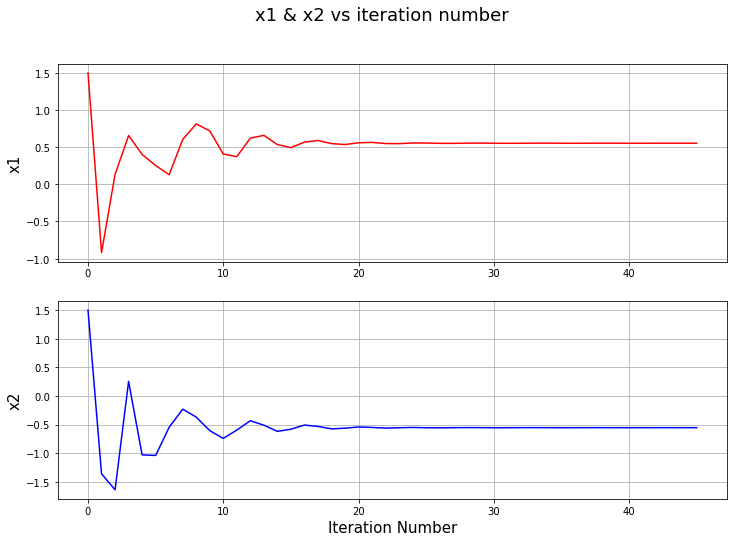

In [47]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12,8)

fig.suptitle('x1 & x2 vs iteration number', fontsize = 18)
#subplot 1
axs[0].plot(x, x1_val,'r')
axs[0].grid()
axs[0].set_ylabel('x1', fontsize = 15)

#subplot 2
axs[1].plot(x, x2_val, 'b')
axs[1].grid()
axs[1].set_ylabel('x2', fontsize = 15)

plt.xlabel('Iteration Number', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'f(x) vs Iteration Number [FR-CG]')

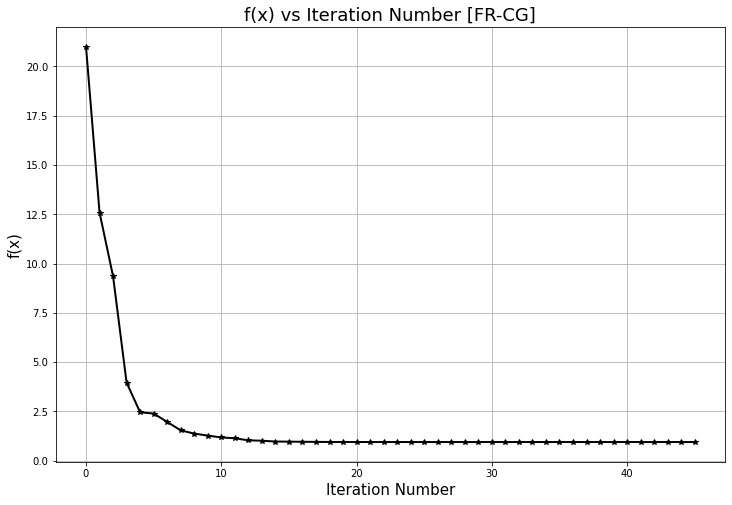

In [50]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 8)
plt.plot(x,fx_val, color = 'k', marker='*', linewidth = 2)
plt.grid()
plt.xlabel('Iteration Number', fontsize = 15)
plt.ylabel('f(x)', fontsize = 15)
plt.title('f(x) vs Iteration Number [FR-CG]', fontsize = 18)